<a href="https://colab.research.google.com/github/BalkrishanSingh/TR102-2302492/blob/main/Week-2/Day6/Day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix #For confusion matrixes

In [37]:
df = pd.read_csv('Iris.csv')

In [38]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [41]:
df.drop(['Id'], axis=1, inplace=True)

In [42]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [44]:
df.drop_duplicates(inplace=True)

In [45]:
# Splitting into features and target
x = df.drop(['Species'], axis=1)
y = df['Species']

# Splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

Text(0, 0.5, 'score')

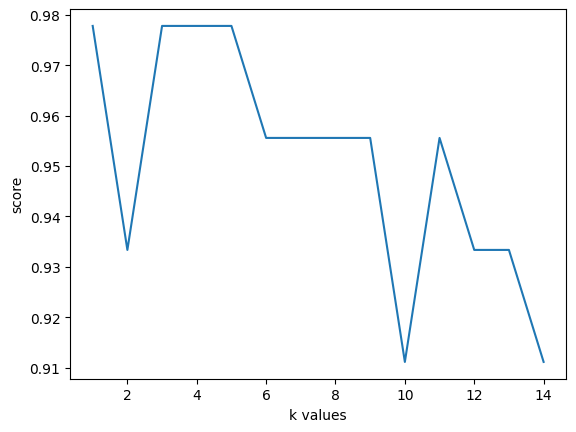

In [46]:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("score")

In [48]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 4: {}".format(knn.score(x_test,y_test)))



Score for Number of Neighbors = 4: 0.9777777777777777


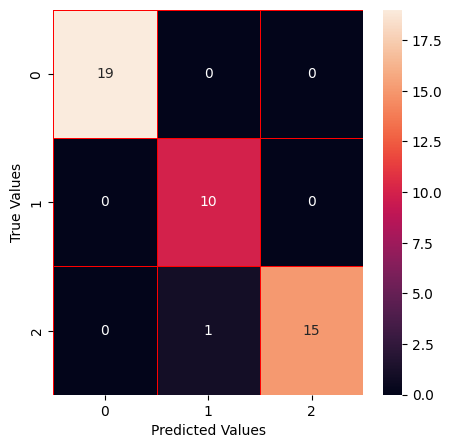

In [49]:
#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [50]:

svm = SVC(kernel='linear',random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))


SVM Classification Score is: 0.9555555555555556


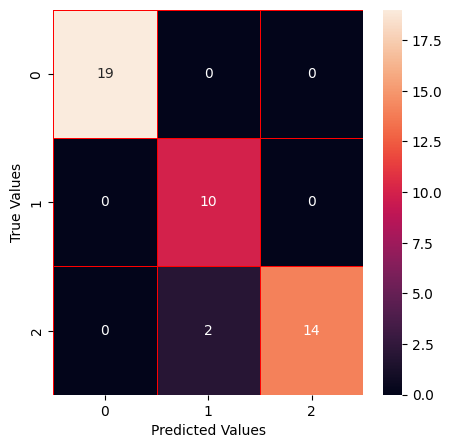

In [52]:
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()